In [1]:
using Plots
plotlyjs()

Plots.PlotlyJSBackend()

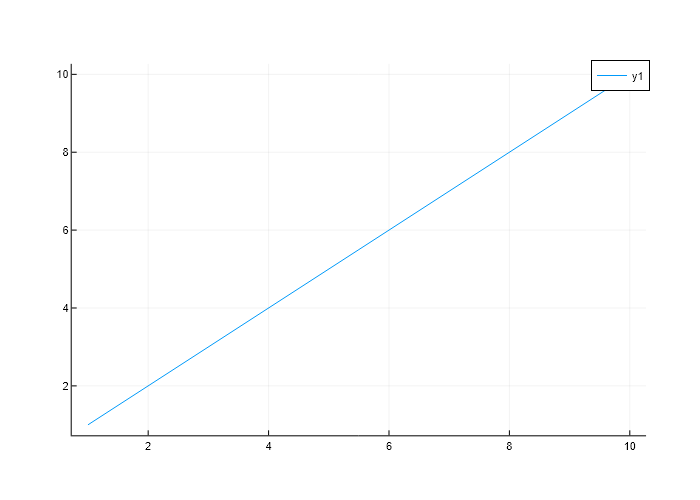

In [2]:
plot(1:10)

In [43]:
include("../src/test.jl")

In [4]:
P = PolygonalChain(6)

PolygonalChain(Point[Point(0.0729808269509015783427230417146347463130950927734375, 0.2235774291521959167283739589038304984569549560546875, 0.653591628637153920777791427099145948886871337890625), Point(0.8951223728408710389459201905992813408374786376953125, 0.765701835477256675943635855219326913356781005859375, 0.1685559167716998985042664571665227413177490234375), Point(0.2929938750714315975898216493078507483005523681640625, 0.68638357206357891726611342164687812328338623046875, 0.56959281126804217620929193799383938312530517578125), Point(0.251715893805585455567097596940584480762481689453125, 0.6080095240546536938808230843278579413890838623046875, 0.3651167418013463450421340894536115229129791259765625), Point(0.9989209575815696240397301153279840946197509765625, 0.0468343879383452676989918472827412188053131103515625, 0.9307568407922357511807831542682833969593048095703125), Point(0.7346093221040284060308067637379281222820281982421875, 0.3682310570556255324703442965983413159847259521484375,

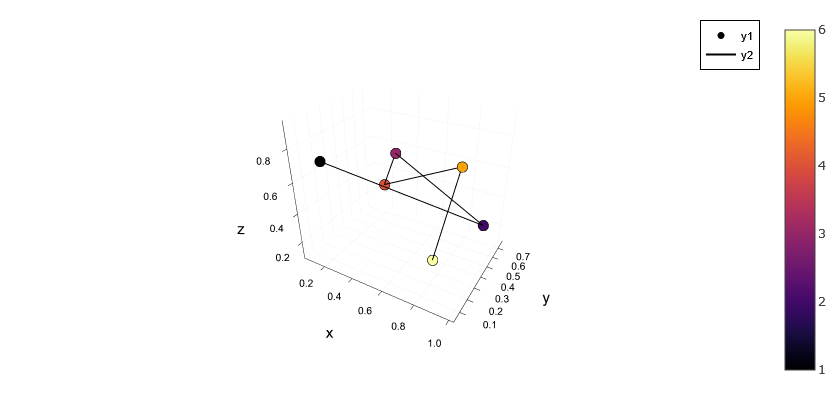

In [5]:
p = plot()
plotChain!(P)
p

In [6]:
function planeRotationYZ(u::Point)::Matrix
    if isapprox(distance(ex,u),0,atol=1e-15)
        #println("cache lo raros")
        return Matrix(1,0,0,0,1,0,0,0,1)
    else
        theta = iangle(u,ex)
        u = unitVector(cross(u,ex))
        return rotation(theta,u)
    end
end

planeRotationYZ (generic function with 1 method)

In [7]:
function moveBeforeInternal(P::PolygonalChain,i::Integer)
    newP = copy(P)
    n = length(P)
    if 1 <= i <= n-1
        u = unitVector(newP[i]-newP[i+1])
        mat1 = planeRotationYZ(u)
        pivot = newP[i+1]
        for j in 1:n+1
            newP[j] = mat1*(newP[j]-pivot)
        end
        # second rotation
        v = unitVector(newP[i+2])  # newP[i+1] = e0
        n1 = cross(v,ex)
        theta = atan(newP[i+2].y,newP[i+2].z)-pi/2
        mat2 = xrotation(theta)
        for j in 1:n+1
            newP[j] = mat2*newP[j]
        end
        return newP
    else
        error("i is not in range of internals")
    end
end

moveBeforeInternal (generic function with 1 method)

In [8]:
newP = moveBeforeInternal(P,3)

PolygonalChain(Point[Point(0.09638785833971714396334201887192610306847314854732933097912403936749375053341176, 0.2028935444101779801056354423118711592770986602214841163898806323314168667895381, -0.4609724617056103069343497385543351493225226009994437906372720570430001336803363), Point(-0.005719306731424346938278771604603617182529430599267400591556099463884604988520247, 0.286371151972005510441206772133033416580836718464674195712786014455802223663176, 0.6288352511838536262373046365529615717403757228728440102554471862547424301654417), Point(0.2228381164056945622493068783633717195141074464411972059790793480751321149733073, 7.019694195936875585090925473376147000921348100175299585695699952494598173677766e-79, 2.998696443128539968869801996868097911246544434460826060928516241670650201728629e-79), Point(0.0, 0.0, 0.0), Point(0.4600712633589899026601263720761712610809887193563368868702099375496943757842336, 0.9907149413152685363913406510928264442397838793942379135277960084017402489229386, 6.06637

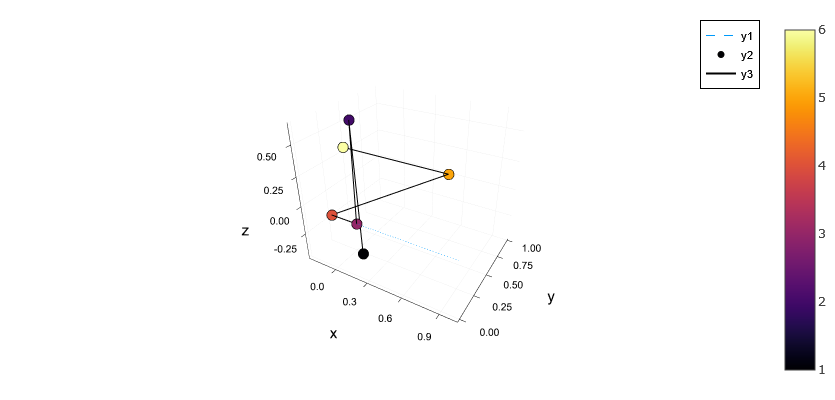

In [9]:
p = plot([0,1],[0,0],[0,0],linestyle=:dash)
plotChain!(newP)
p

In [10]:
toArray(newP)

6×3 Base.Matrix{BigFloat}:
  0.0963879   0.202894     -0.460972
 -0.00571931  0.286371      0.628835
  0.222838    7.01969e-79   2.9987e-79
  0.0         0.0           0.0
  0.460071    0.990715      6.06638e-17
 -0.233044    0.460055      0.303455

In [11]:
newP = moveBeforeDihedral(P,2)

PolygonalChain(Point[Point(0.2530776166666466424555763985565367483399404043171331696706198378396923917345597, 0.4354458872886332391308756736970473544079776311630201852034775090485727912175341, -0.09638785833971714396334201887192610306847314854732933097912403936749375053340313), Point(0.2143937092046687202358984537954278171619075049847520687652788709884436373429596, -0.6568695055082841230346145238036508941254425941490343241734456622793836651306839, 0.005719306731424346938278771604603617182529430599267400591556099463884604988509452), Point(2.159042138773611156346587965700099892779000091109070346255925867542147950790607e-78, 3.23856320816041673451988194855014983916850013666360551938388880131322192618591e-78, -0.2228381164056945622493068783633717195141074464411972059790793480751321149733094), Point(0.0, 0.0, -0.0), Point(0.9845243797513499750344606126881999301653718133999448450324849262084200939912991, -0.1105795669214507424503145987879186047437980316697995357233677900742996996945925, -0.4

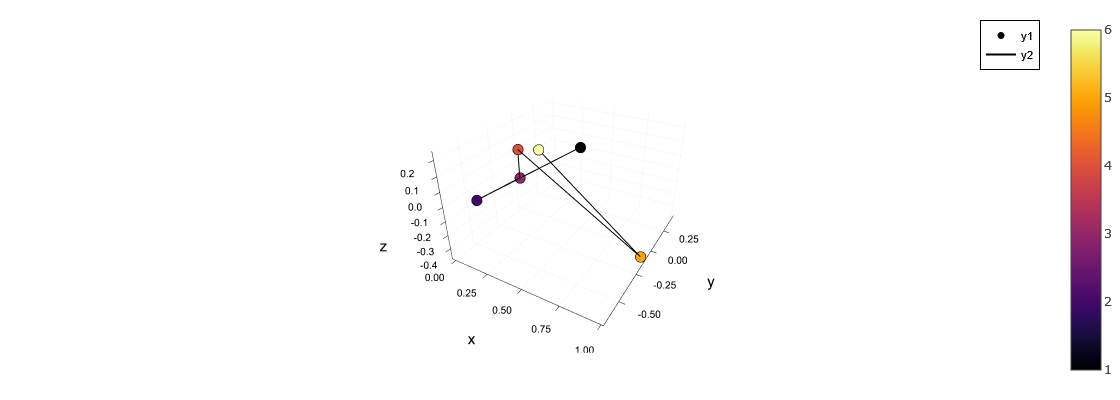

In [37]:
p = plot()
plotChain!(newP)
p

In [44]:
n = length(P)
dihed = rand(n-1:2*n-3)
phi = rand()*(pi/2) + (-pi/4)
inter_flag , newQ = mutateChain(P,dihed,phi,debug=true)

3,1
caso 2
3,2
caso 3
primera pasada
(2.0, 1.0, 1.0)
4,1
caso 1
(0, 0.0, 0.0)
4,2
caso 1
(2, 0.6938160636122749811674694143564510011317473542452747200933542588526927548220059, 1.306183936387725018832530585643548998868252645754725279906645741147307245178003)
la raíz esta bien
Point(0.2228381164056945556389701148717146173353623706021577211078138746272773204238761, 9.384002345451057833022010315943018275042468229261883689795200425342665606908314e-80, -2.294514503779339893232514949985538693003693469899521748584672765899671840533401e-79)
-0.9016234245895357072145699629245388989161188945691089550763450595574253441410153,1.295458974523885708245551784469190683637552991952193672058305418421636496189059e-17
1.436807140535022940914682772483679128063410627728710676221029022220314618372309e-17
-1.251348494176536741494190786965631105457964565806511025774187738306849582404736
en z está bien
1.436807140535022940914682772483679128063410627728710676221029022220314618372309e-17
-1.251348494176536741494190

(false, PolygonalChain(Point[Point(-0.2787497311884774457626439100602753214631851091468888394969284455432697255993988, 0.2253923160708284751162606097428812362485253898582533521446459294914885788120474, -0.3756966326676176539541875746239934191248205511792336796494866714750967667881957), Point(0.7277916635166370034377743107996983638459809097192625651552594522363724996395708, 3.064825168871029167850489436113522682595980653088352275479555415484479331374421e-79, -7.49390882764588914261081737319282869106296357088872009759936485452358422566937e-79), Point(0.0, 0.0, 0.0), Point(0.06998061150675796858116148991323903159255118628816805676347247995000978271338779, 0.2115645058519460022069297831761838524645577359704532109910574532468703188300767, 1.295458974523885708245551784469190683637552991952193672058305418421636496189059e-17), Point(0.3153248295825397703989014770423148956096313513217680081148919785327540070514439, -0.35417666924694499381958965304640946661481017829277325829178864843272044285214